# Custom Image Dataset Loader and Usage 

Addressed the numerical data loader...

How to handle images ? Custom unstructured image dataloader in pytorch 

While numerical dataframe are structured in nature, it has a set of features columsn x = (x1, x2, x3, ...) y =  target

We converted X in train and test, the same for y  (train dataset, test dataset)


With structured data is simpler to make the splitting...

With images is a bit harder to handle it ! 

In [2]:
import torch 
import os 
from PIL import Image 
from torchvision import transforms # torch library for vision
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Dataset: https://drive.google.com/file/d/1G9H2W0R6JLYYBXyHNM_kAcBufUJr4Qsy/view
!unzip './Classification_dataset_v3.zip'

Archive:  ./Classification_dataset_v3.zip
   creating: Classification_dataset_v3/
  inflating: Classification_dataset_v3/Dataset_info.txt  
   creating: Classification_dataset_v3/images/
   creating: Classification_dataset_v3/images/test/
   creating: Classification_dataset_v3/images/test/Cat/
  inflating: Classification_dataset_v3/images/test/Cat/cat_1000.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1001.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1002.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1003.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1004.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1005.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1006.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1007.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1008.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1009.jpg  
  inf

In [5]:
image_dir = './Classification_dataset_v3/images/train'
for label, class_dir in enumerate(os.listdir(image_dir)):
    # iterate over the subdirectory corresponding to the classes 
    print(label, class_dir)


0 person
1 Dog
2 Cat


In [8]:
# Create image dataset dataloader 
# (batches and shuffle handler)
class ImageDataset(Dataset):
    # directory of the dataset 
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_paths = []
        self.labels = [] # create labels for images (structured label format)
        self.class_names = {}

        self.transform = transform

        for label, class_dir in enumerate(os.listdir(image_dir)):
            # iterate over the subdirectory corresponding to the classes 
            self.class_names[label] = class_dir

            class_path = os.path.join(image_dir, class_dir)
            for image_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, image_name))
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        # the model expect an array, not the path! 
        image = Image.open(image_path).convert("RGB") #mention RGB convertion for safety
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
            # resize and convert to tensor
            
        # return image and label when getitem is called intrnally 
        return image, label        

In [9]:
# The dataloader properly load the dataset..
# Images will be of different sizes and resolutions.. 
# Standardization needs to be done while making the batches for training *you use transforms) 

# different kind of transormation from transforms
# e.g.
transform = transforms.Compose([
    transforms.Resize((128, 128)), # lower resolution for fatser speed 
    transforms.ToTensor() # instead of pillow image, pytorch model expect tensors 
])

# With the transform it can be used on the image whenever the dataloader is called at initialization

In [10]:
# Create your own data loader 
# Two set of data for training and test for train and evaluation of performances
train_image_dir = './Classification_dataset_v3/images/train'
test_image_dir = './Classification_dataset_v3/images/test'

train_image_dataset = ImageDataset(train_image_dir, transform)
test_image_dataset = ImageDataset(test_image_dir, transform)

In [11]:
# Wrap dataset with data loader
train_image_loader = DataLoader(dataset=train_image_dataset, batch_size=32, shuffle=True)
test_image_loader = DataLoader(dataset=test_image_dataset, batch_size=32, shuffle=True)

In [12]:
# Check if it is working well 
for images, labels in train_image_loader:
    print(images.shape, labels.shape)

torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([32, 3, 128, 128]) torch.Size([32])
torch.Size([3

In [14]:
# Loading and Random Shuffling is possible 
import matplotlib.pyplot as plt 
import numpy as np 

# Visualize the images and labels 
print(train_image_dataset.class_names)
print(test_image_dataset.class_names)


{0: 'person', 1: 'Dog', 2: 'Cat'}
{0: 'person', 1: 'Dog', 2: 'Cat'}


torch.Size([32, 3, 128, 128]) torch.Size([32])
(3, 128, 128)
Cat
(128, 128, 3)
2


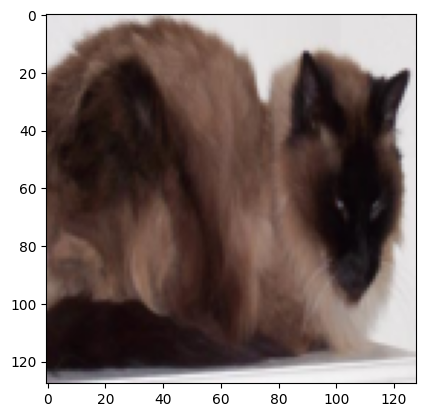

In [ ]:
# the dataloader is an iterable object ...
for images, labels in train_image_loader:
    print(images.shape, labels.shape)
    image = images[0].numpy()
    label = labels[0].item()

    print(image.shape)
    print(train_image_dataset.class_names[label])

    image = np.transpose(image, (1, 2, 0)) # change dimension properly 
    print(image.shape)
    print(label)

    plt.imshow(image, vmin=0, vmax=255)

    break # don't plot for all batches for now... 

# The custom data loader for unstructured dataset can properly load the image dataset